# EAS 4610 - Earth Systems Modeling - Final Project
## Atmospheric/Shallow Water Gravity Waves
### By: Carson Clements, Kate Breeden
### Due: Tuesday, December 6th
### Requirements/Rubric: https://gatech.instructure.com/courses/261984/assignments/1234642
### Original Paper (Internal Gravity Waves in the Atmosphere): https://reader.elsevier.com/reader/sd/pii/S007461420480041X?token=0857787B8B9E9271C8A60B92489BEFF2C13E45CB9E82B096A270BAF36C9140939E1555793F0E0CF14F4AF85AECACF9A9&originRegion=us-east-1&originCreation=20221129172936

List of Requirements
## Introduction

## Equations

## Numerical Methods

## Results

## Figures

## WaveEqnDemo Base
### Created by: Dr. Robel
### Minor Edits by: Carson Clements, Kate Breeden

### Necessary Imports

In [396]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma
from scipy.sparse import spdiags

### Parameters to Consider

In [397]:
alpha1 = 1
alpha2 = 2
L = 30.0
xt = 15
tf = 100.0

### Assembling the Grid

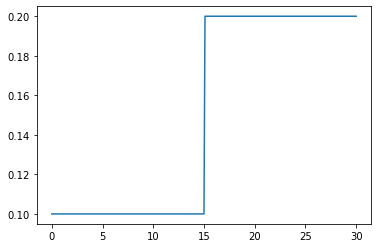

In [398]:
nx = 301
nt = 10000

x = np.linspace(0,L,nx) # Need L to evenly divide into nx
t = np.linspace(0,tf,nt) # Need tf to evenly divide into nt

dt = t[1]-t[0]
dx = x[1]-x[0]

lam = np.zeros(nx)
lam[x<=xt] = alpha1*dt/dx
lam[x>xt] = alpha2*dt/dx

plt.plot(x,lam)

### Pre-Allocating Variables and Initial Conditions

In [399]:
u = np.nan*np.ones([nx,nt])
u[:,0] = np.exp(-(x**2) / 2)
u[:,1] = np.exp(-(x**2) / 2)

### Making the Tridiagonal Matrix

In [400]:
data = np.array([(lam**2)*np.ones(nx), 2*(1-lam**2)*np.ones(nx), (lam**2)*np.ones(nx)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, nx, nx).toarray()

### Establishing Boundary Conditions

In [401]:
#Reflective BC
M[0,0] = 2-lam[0]**2
M[-1,-1] = 2-lam[-1]**2

### Solving the Equation

In [402]:
for k in np.arange(nt-2):
    u[:,k+2] = np.matmul(M,u[:,k+1]) - u[:,k]

### Plotting the Solution

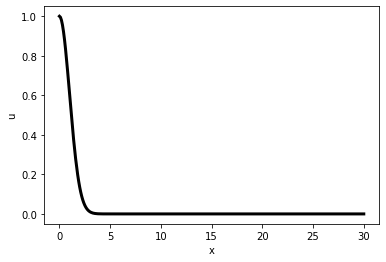

In [403]:
for k in range(1, 10, nt):
    plt.plot(x,u[:,k], 'k', linewidth=3)
    plt.xlabel('x')
    plt.ylabel('u')
    #set(gca,fontsize=20)

# Creating the Wave Function
## Case 1 - c (or alpha) is Constant in Space

### Parameters to (re)Consider

In [404]:
#alpha = u + or - sqrt(gravity * Height or Mean Depth of Lower Layer)
# Have to modify above equation to fit two alpha values'
# Assume perturbation values can be neglected because H >> h'
# Assume two layers we're dealing with are water (bottom) and air (top)
# h' = A*e^(ik[x-(u+sqrt(gH))t]) What is A? i & k are time and place step, respectively
# Remember: default equation is partial 2nd time (t) derivative of h' + c^2 * partial 2nd space (x) derivative of h' = 0
g = 9.81 #m/(s^2) - average gravitational acceleration
H = 3700 #m - also the average depth of the ocean
u_Line_Stable = 10 #m/s - somewhat of an average zonal wind speed value for majority of earth
u_Line_Reverse = -10 #m/s - somewhat of an average zonal wind speed value for majority of earth
# The following are based upon the assumption that the upper layer is air and the lower layer is water
c1 = u_Line_Stable + ma.sqrt(g*H)
c2 = u_Line_Reverse - ma.sqrt(g*H)
x_Scale = 1.0 #5000 #m - part of a 5km space scale
t_Scale = 1.0 #3600 #s - hourly time scale

### Assembling a New Grid

In [405]:
x_Total = 568 #28385000 #m - "circumference" of the Earth at 45 degrees latitude (mid-latitudes)
t_Total = 336 #1209600 #s - amount of time for an individual air parcel to circumnavigate the globe in the mid-latitudes (roughly 2 weeks)

x_Array = np.linspace(0,x_Scale,x_Total) # Need x_Scale to evenly divide into x_Total
t_Array = np.linspace(0,t_Scale,t_Total) # Need t_Scale to evenly divide into t_Total

delta_t = t_Array[1]-t_Array[0] #time step
delta_x = x_Array[1]-x_Array[0] #space step

lam_Stable = np.zeros(x_Total) #Creating the stable c/alpha case
for i in np.arange(x_Total):
    lam_Stable[i] = c1*delta_t/delta_x #Establishing the stable c/alpha case

lam_Reverse = np.zeros(x_Total) #Creating the stable c/alpha case with opposite flow
for i in np.arange(x_Total):
    lam_Reverse[i] = c2*delta_t/delta_x #Establishing the above case

### Creating the two Matrices and Allocating for Space Within Them

In [406]:
stable_u = np.nan*np.ones([x_Total,t_Total])
stable_u[:,0] = np.exp(-(x_Array**2) / 2)
stable_u[:,1] = np.exp(-(x_Array**2) / 2)

reverse_u = np.nan*np.ones([x_Total,t_Total])
reverse_u[:,0] = np.exp(-(x_Array**2) / 2)
reverse_u[:,1] = np.exp(-(x_Array**2) / 2)

### Modifying the Matrices to Make Them Tridiagonal

In [407]:
# Westerlies in mid-latitudes
stable_Data = np.array([(lam_Stable**2)*np.ones(x_Total), 2*(1-lam_Stable**2)*np.ones(x_Total), (lam_Stable**2)*np.ones(x_Total)])
stable_Diags = np.array([-1, 0, 1])
stable_M = spdiags(stable_Data, stable_Diags, x_Total, x_Total).toarray()

# Now for the Other Option (aka westerlies are now easterlies)
reverse_Data = np.array([(lam_Reverse**2)*np.ones(x_Total), 2*(1-lam_Reverse**2)*np.ones(x_Total), (lam_Reverse**2)*np.ones(x_Total)])
reverse_Diags = np.array([-1, 0, 1])
reverse_M = spdiags(reverse_Data, reverse_Diags, x_Total, x_Total).toarray()

### Determining Appropriate Boundary Conditions

In [408]:
#Reflective BC
stable_M[0,0] = 2-lam_Stable[0]**2
stable_M[-1,-1] = 2-lam_Stable[-1]**2

#Reflective BC
reverse_M[0,0] = 2-lam_Reverse[0]**2
reverse_M[-1,-1] = 2-lam_Reverse[-1]**2

### Solving the Wave Equation

In [409]:
# First up, the normal case
for k in np.arange(t_Total-2):
    stable_u[:,k+2] = np.matmul(stable_M,stable_u[:,k+1]) - stable_u[:,k]
    
# And now the reverse!
for k in np.arange(t_Total-2):
    reverse_u[:,k+2] = np.matmul(reverse_M,reverse_u[:,k+1]) - reverse_u[:,k]

#Still Generating RuntimeWarnings due to overflow and invalid values in matmul - investigate asap

C:\Users\carso\AppData\Local\Temp/ipykernel_19232/3733149974.py:3: RuntimeWarning: overflow encountered in matmul
  stable_u[:,k+2] = np.matmul(stable_M,stable_u[:,k+1]) - stable_u[:,k]
C:\Users\carso\AppData\Local\Temp/ipykernel_19232/3733149974.py:3: RuntimeWarning: invalid value encountered in matmul
  stable_u[:,k+2] = np.matmul(stable_M,stable_u[:,k+1]) - stable_u[:,k]
C:\Users\carso\AppData\Local\Temp/ipykernel_19232/3733149974.py:7: RuntimeWarning: overflow encountered in matmul
  reverse_u[:,k+2] = np.matmul(reverse_M,reverse_u[:,k+1]) - reverse_u[:,k]
C:\Users\carso\AppData\Local\Temp/ipykernel_19232/3733149974.py:7: RuntimeWarning: invalid value encountered in matmul
  reverse_u[:,k+2] = np.matmul(reverse_M,reverse_u[:,k+1]) - reverse_u[:,k]


### Plotting the Two Results

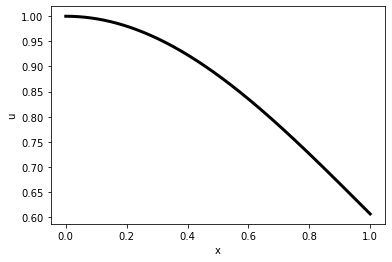

In [410]:
#Normal Case is First
for k in range(1, 4, t_Total):
    plt.plot(x_Array,stable_u[:,k],'k',linewidth=3)
    plt.xlabel('x');
    plt.ylabel('u');

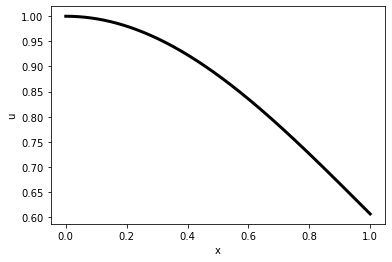

In [411]:
#Reverse Case
for k in range(1, 4, t_Total):
    plt.plot(x_Array,reverse_u[:,k],'k',linewidth=3)
    plt.xlabel('x');
    plt.ylabel('u');

# Wave Function Part II
## Case 2 - c = c(x) [alpha = alpha(x)]

### Re-evaluating Parameters

In [412]:
#H is now a function of x, which means c = c(x) and alpha = alpha(x) for both forward and reverse cases
#The rest of the parameters are still unchanged from Case 1 and can be recalled as is, though will be restated here
g = 9.81 #m/(s^2) - average gravitational acceleration
H = np.zeros(x_Total)
H = 5*np.sin(x_Array)
u_Line_Stable = 10 #m/s - somewhat of an average zonal wind speed value for majority of earth
u_Line_Reverse = -10 #m/s - somewhat of an average zonal wind speed value for majority of earth
c3 = np.zeros(x_Total)
c4 = np.zeros(x_Total)
for i in np.arange(x_Total):
    c3[i] = u_Line_Stable + ma.sqrt(g*H[i])
    c4[i] = u_Line_Reverse - ma.sqrt(g*H[i])
H

array([0.        , 0.00881834, 0.01763665, 0.0264549 , 0.03527308,
       0.04409114, 0.05290907, 0.06172683, 0.0705444 , 0.07936175,
       0.08817885, 0.09699568, 0.10581221, 0.1146284 , 0.12344425,
       0.1322597 , 0.14107475, 0.14988936, 0.1587035 , 0.16751715,
       0.17633027, 0.18514285, 0.19395485, 0.20276625, 0.21157702,
       0.22038713, 0.22919655, 0.23800527, 0.24681324, 0.25562044,
       0.26442685, 0.27323243, 0.28203717, 0.29084103, 0.29964398,
       0.308446  , 0.31724707, 0.32604714, 0.3348462 , 0.34364422,
       0.35244118, 0.36123703, 0.37003176, 0.37882534, 0.38761774,
       0.39640894, 0.4051989 , 0.41398761, 0.42277502, 0.43156112,
       0.44034588, 0.44912927, 0.45791126, 0.46669182, 0.47547094,
       0.48424857, 0.4930247 , 0.5017993 , 0.51057233, 0.51934378,
       0.52811361, 0.5368818 , 0.54564832, 0.55441314, 0.56317624,
       0.57193759, 0.58069715, 0.58945491, 0.59821084, 0.6069649 ,
       0.61571708, 0.62446734, 0.63321566, 0.64196201, 0.65070